<a href="https://colab.research.google.com/github/Nicolas-Nav/DeepLearning/blob/main/DLY0100_Entrega_1_Equipo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluaci√≥n 1 - Entrenando redes feedforward

**Autores:**

+ Nicolas Navarro
+ Gabriela Sandoval

**Correos Electr√≥nicos:**

+ ni.navarroa@duoc.cl
+ g.sandoval@duoc.cl

**Fecha de Creaci√≥n:** Abril de 2025  
**Versi√≥n:** 1.0  

---

## Descripci√≥n

Este notebook contiene el desarrollo de la evaluaci√≥n 1 de la asignatura de Deep Learning de la carrera de Ingenier√≠a en Inform√°tica de DuocUC sede Concepci√≥n.

---

## Requisitos de Software

Este notebook fue desarrollado con Python ...

# Carga de datos

In [3]:
!rm -f train-images-idx3-ubyte.gz train-labels-idx1-ubyte.gz t10k-images-idx3-ubyte.gz t10k-labels-idx1-ubyte.gz

!wget https://storage.googleapis.com/cvdf-datasets/mnist/train-images-idx3-ubyte.gz
!wget https://storage.googleapis.com/cvdf-datasets/mnist/train-labels-idx1-ubyte.gz
!wget https://storage.googleapis.com/cvdf-datasets/mnist/t10k-images-idx3-ubyte.gz
!wget https://storage.googleapis.com/cvdf-datasets/mnist/t10k-labels-idx1-ubyte.gz


--2025-04-16 05:10:05--  https://storage.googleapis.com/cvdf-datasets/mnist/train-images-idx3-ubyte.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 192.178.163.207, 173.194.202.207, 173.194.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|192.178.163.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‚Äòtrain-images-idx3-ubyte.gz‚Äô

train-images-idx3-u 100%[===================>]   9.45M  26.0MB/s    in 0.4s    

2025-04-16 05:10:05 (26.0 MB/s) - ‚Äòtrain-images-idx3-ubyte.gz‚Äô saved [9912422/9912422]

--2025-04-16 05:10:05--  https://storage.googleapis.com/cvdf-datasets/mnist/train-labels-idx1-ubyte.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 192.178.163.207, 173.194.202.207, 173.194.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|192.178.163.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2888

In [4]:
!ls -lh

total 12M
drwxr-xr-x 1 root root 4.0K Apr 11 13:37 sample_data
-rw-r--r-- 1 root root 1.6M Apr  6  2017 t10k-images-idx3-ubyte.gz
-rw-r--r-- 1 root root 4.5K Apr  6  2017 t10k-labels-idx1-ubyte.gz
-rw-r--r-- 1 root root 9.5M Apr  6  2017 train-images-idx3-ubyte.gz
-rw-r--r-- 1 root root  29K Apr  6  2017 train-labels-idx1-ubyte.gz


In [18]:
import gzip
import pandas as pd
import shutil
import struct
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
###
from keras.utils import to_categorical

#Introduccion

Introducci√≥n: Descripci√≥n del problema y objetivo del modelo.


En este notebook se trabajar√° con el dataset MNIST, que contiene im√°genes de d√≠gitos escritos a mano (0‚Äì9). Como primer paso, es fundamental preprocesar los datos antes de entrenar una red neuronal.

Primero, cada imagen tiene un tama√±o original de 28x28 p√≠xeles, lo que significa que est√° compuesta por 784 valores (28√ó28). Para poder trabajar con estas im√°genes en una red neuronal, debemos aplanarlas, es decir, se convierten en un vector de tama√±o 784 en lugar de una matriz 2D.

Luego, las im√°genes se normalizan, es decir, se dividen sus valores por 255 para que queden entre 0 y 1. Esto mejora la eficiencia del entrenamiento, ya que evita trabajar con n√∫meros muy grandes que podr√≠an afectar negativamente el c√°lculo de los gradientes durante el entrenamiento.

Por otra parte, las etiquetas que indican el n√∫mero que representa cada imagen tambi√©n deben ser procesadas. En este caso utilizaremos el one-hot encoding, lo que convierte, por ejemplo, un "3" en el vector [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]. Esto es necesario porque la red no puede trabajar directamente con n√∫meros enteros como clases, ya que no entiende que son categor√≠as y no cantidades.

El dataset incluye 60.000 im√°genes para entrenamiento y 10.000 para prueba, lo que permite entrenar el modelo con muchos ejemplos y evaluarlo con datos nuevos para medir su capacidad de generalizar.

Finalmente, este preprocesamiento adapta correctamente las im√°genes y etiquetas al formato que requiere la red neuronal para aprender de manera efectiva.

# Carga de im√°genes

In [6]:
# Funci√≥n para cargar im√°genes MNIST
def load_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)  # Saltar los primeros 16 bytes del encabezado
    return data.reshape(-1, 28 * 28).astype("float32") / 255.0  # Aplanar y normalizar

# Funci√≥n para cargar etiquetas MNIST
def load_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)  # Saltar los primeros 8 bytes del encabezado
    return keras.utils.to_categorical(labels, 10)  # One-hot encoding para clasificaci√≥n

# Cargar los datos
X_train = load_mnist_images("train-images-idx3-ubyte.gz")
y_train = load_mnist_labels("train-labels-idx1-ubyte.gz")
X_test = load_mnist_images("t10k-images-idx3-ubyte.gz")
y_test = load_mnist_labels("t10k-labels-idx1-ubyte.gz")

# Verificar dimensiones
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


X_train: (60000, 784), y_train: (60000, 10)
X_test: (10000, 784), y_test: (10000, 10)


# Muestra im√°genes

In [7]:
nombres = ['0','1','2','3','4','5','6','7','8','9']

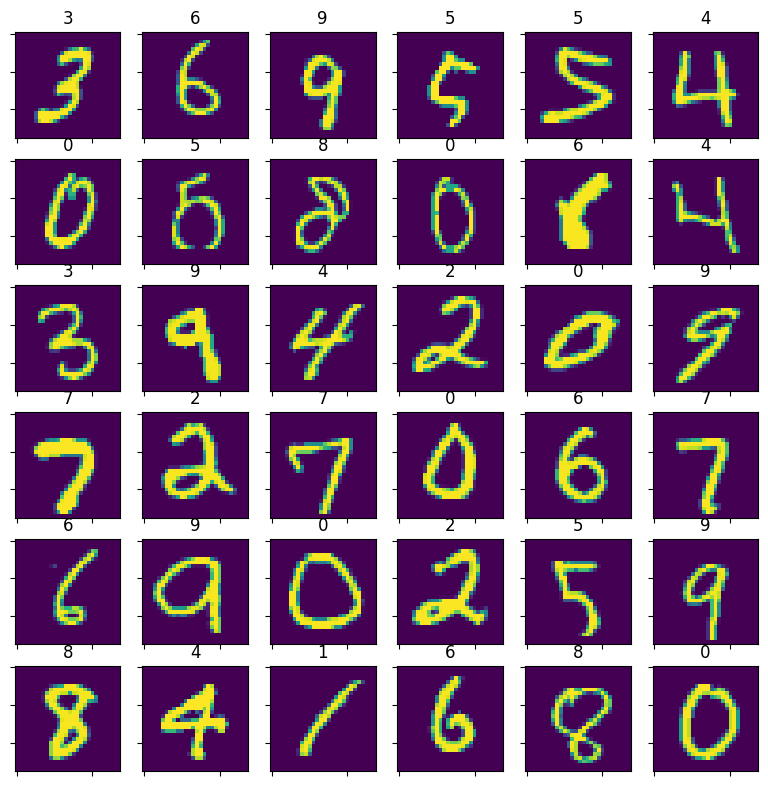

In [8]:
h = 6
w = 6
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(0, X_train.shape[0])
    predicted_label = np.argmax(y_train[ex])
    axs[i,j].set_title(nombres[predicted_label])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(X_train[ex].reshape(28, 28))

In [9]:
numimagen = np.sum(y_train, axis=0)

for i in range(10):
    print(f"Cantidad de im√°genes del n√∫mero {i}: {numimagen[i]}")

Cantidad de im√°genes del n√∫mero 0: 5923.0
Cantidad de im√°genes del n√∫mero 1: 6742.0
Cantidad de im√°genes del n√∫mero 2: 5958.0
Cantidad de im√°genes del n√∫mero 3: 6131.0
Cantidad de im√°genes del n√∫mero 4: 5842.0
Cantidad de im√°genes del n√∫mero 5: 5421.0
Cantidad de im√°genes del n√∫mero 6: 5918.0
Cantidad de im√°genes del n√∫mero 7: 6265.0
Cantidad de im√°genes del n√∫mero 8: 5851.0
Cantidad de im√°genes del n√∫mero 9: 5949.0


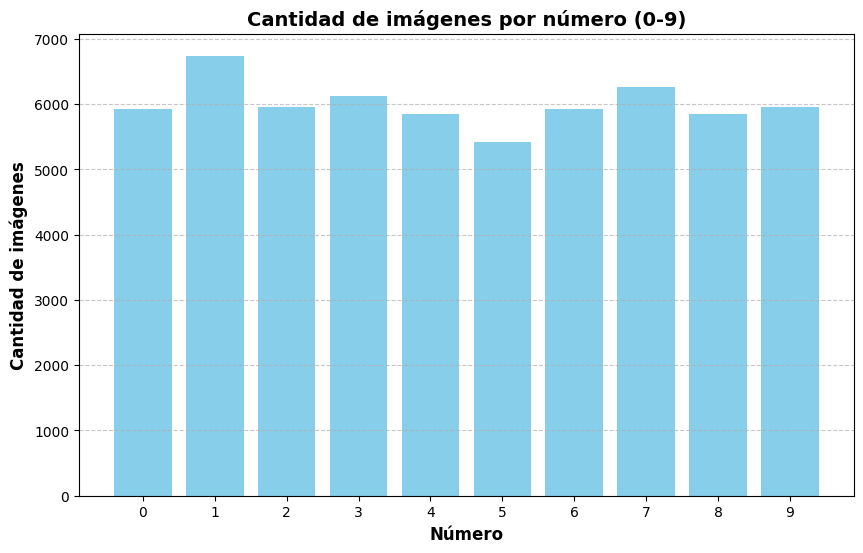

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(numimagen)), numimagen, color='skyblue')
plt.title('Cantidad de im√°genes por n√∫mero (0-9)', fontsize=14, fontweight="bold")
plt.xlabel('N√∫mero', fontsize=12, fontweight="bold")
plt.ylabel('Cantidad de im√°genes', fontsize=12, fontweight="bold")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(10))
plt.show()

Las im√°genes del dataset est√°n relativamente balanceadas entre las 10 clases. La clase con m√°s ejemplos es el n√∫mero 1 (6742 im√°genes) y la que menos tiene es el n√∫mero 5 (5421 im√°genes). Aunque hay peque√±as diferencias, la distribuci√≥n es lo suficientemente equilibrada como para entrenar modelos sin riesgo significativo de sesgo hacia una clase espec√≠fica.

1. explicacion m,n,c
2. explicacion seed
3. explicacion cantidad de capas ocupltas y su valor
4. cantidad de epocas
5. explicacion de funcion loss (si categorical_crossentropy no binary_corss)
5. eleccion de optimizadores (sgd y adam)
6. eleccion de avticadores con sus ventajas (relu y elu)
6. con activacion (relu)
7. vs con avticacion (elu)
8. explicaion de comparacion de fun activacion
9. cambio bachsize y explicacion
10. cambio epocas y explicacion
11. drop out
12. comparacion mejor modelo sin regulacion y con


#Entrenamiento y ajuste de hiperpar√°metros

## Explicaci√≥n M, N y C

In [11]:
M = X_train.shape[0]
N = X_train.shape[1]
C = y_train.shape[1]
print(M,N,C)

60000 784 10


*COMENTARIO

## Explicaci√≥n Seed

In [12]:
# Setea los seed para n√∫meros random
np.random.seed(29)
tf.random.set_seed(29)

El prop√≥sito principal de establecer las semillas de los generadores de n√∫meros aleatorios es permitir la reproducibilidad del c√≥digo. Al fijar estas semillas, se asegura que cualquier persona que ejecute este c√≥digo bajo las mismas condiciones (misma versi√≥n de librer√≠as, hardware, etc.) obtendr√° los mismos resultados. Esto es fundamental para la investigaci√≥n cient√≠fica, ya que permite validar resultados y compararlos en diferentes pruebas.

## Explicacion cantidad de capas ocupltas y su valor

In [13]:
h1 = 512
h2 = 256
h3 = 128

## Explicacion epocas y batch size inicial

epocas de 10 pq nose y batch size de 32 pq nose

## Explicaci√≥n de funci√≥n de perdida (loss) (si categorical_crossentropy no binary_corss)

no se puede ocupar pq binary es bisexual

## Explicacion de acticador softmax en capa de salida y pq no puede ser otro

POR QUE NO NOMAS PU QUE WEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

##EZPLICACION DE METRICAS PARA EVALUAR LOS MODELOS

SI SE QUE ESCRIBI EZPLICACION Y NO EXPLICaCION

# Experimento 1: Optimizador SGD

## Activadores (Relu y Elu)

Explicacion de la funcion de activador y recalcal el de la salida el softmax

### Relu

In [14]:
red_relu = keras.Sequential(name="Red_relu")
red_relu.add(keras.layers.Input(shape=(N,), name='entrada'))
red_relu.add(keras.layers.Dense(h1, activation='relu',name='primera_capa'))
red_relu.add(keras.layers.Dense(h2, activation='relu',name='segunda_capa'))
red_relu.add(keras.layers.Dense(h3, activation='relu',name='tercera_capa'))
red_relu.add(keras.layers.Dense(C, activation='softmax',name='capa_salida'))

red_relu.summary()

Model: "Red_relu"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ primera_capa (Dense)            ‚îÇ (None, 512)            ‚îÇ       401,920 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ segunda_capa (Dense)            ‚îÇ (None, 256)            ‚îÇ       131,328 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ tercera_capa (Dense)            ‚îÇ (None, 128)            ‚îÇ        32,896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ capa_salida (Dense)             ‚îÇ (None, 10)             ‚îÇ         1,290 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

#Explicacion del sumary, ###Oye agregamos el sumary en TODOS los cambios? lo encuentro inutil pq nunca cambiamos la cantidad de capas o la cantidad de neuronas

En la primera capa oculta tiene 512 neuronas, las cuales se multiplican por el valor de las imagen aplanadas 784 (28x28). Los 401,920 par√°metros vienen de: 784*512 pesos + 512 sesgos

La segunda capa oculta. Tiene 256 neuronas. Los par√°metros son: 512*256 + 256

La tercera capa oculta con 128 neuronas: 256*128 + 128

 La capa de salida con 10 neuronas (las 10 etiquetas 0-9). Par√°metros: 128*10 + 10

In [17]:
red_relu.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_relu = red_relu.fit(X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test,y_test)
       )

red_relu.save("red_relu.keras")

Epoch 1/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14s 7ms/step - accuracy: 0.9928 - loss: 0.0320 - val_accuracy: 0.9752 - val_loss: 0.0811
Epoch 2/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 7ms/step - accuracy: 0.9934 - loss: 0.0298 - val_accuracy: 0.9759 - val_loss: 0.0803
Epoch 3/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 7ms/step - accuracy: 0.9942 - loss: 0.0268 - val_accuracy: 0.9762 - val_loss: 0.0795
Epoch 4/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14s 7ms/step - accuracy: 0.9949 - loss: 0.0240 - val_accuracy: 0.9763 - val_loss: 0.0787
Epoch 5/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14s 7ms/step - accuracy: 0.9961 - loss: 0.0215 - val_accuracy: 0.9768 - val_loss: 0.0785
Epoch 6/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 7ms/step - accuracy: 0.9967 - loss: 0.0193 - val_accuracy: 

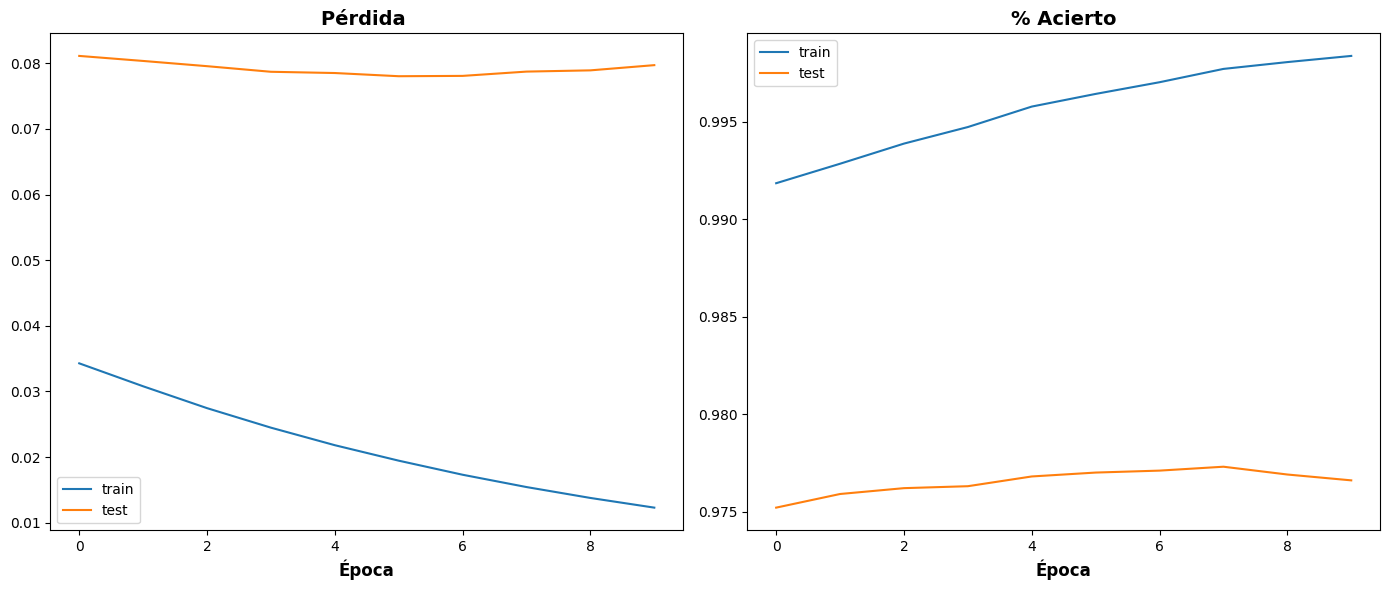

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_relu.history['loss'], label="train")
axs[0].plot(hist_relu.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_relu.history['accuracy'], label="train")
axs[1].plot(hist_relu.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()


*COMENTARIO

### Elu

In [19]:
red_elu = keras.Sequential(name="red_elu")
red_elu.add(keras.layers.Input(shape=(N,), name='entrada'))
red_elu.add(keras.layers.Dense(h1, activation='elu'))
red_elu.add(keras.layers.Dense(h2, activation='elu'))
red_elu.add(keras.layers.Dense(h3, activation='elu'))
red_elu.add(keras.layers.Dense(C, activation='softmax'))

red_elu.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_elu = red_elu.fit(X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test,y_test)
       )

red_elu.save("red_elu.keras")

Epoch 1/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 7ms/step - accuracy: 0.8190 - loss: 0.6815 - val_accuracy: 0.9149 - val_loss: 0.2891
Epoch 2/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 7ms/step - accuracy: 0.9187 - loss: 0.2810 - val_accuracy: 0.9293 - val_loss: 0.2396
Epoch 3/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 7ms/step - accuracy: 0.9319 - loss: 0.2319 - val_accuracy: 0.9401 - val_loss: 0.2033
Epoch 4/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 7ms/step - accuracy: 0.9435 - loss: 0.1956 - val_accuracy: 0.9470 - val_loss: 0.1780
Epoch 5/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 7ms/step - accuracy: 0.9514 - loss: 0.1698 - val_accuracy: 0.9527 - val_loss: 0.1605
Epoch 6/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 7ms/step - accuracy: 0.9567 - loss: 0.1505 - val_accuracy: 

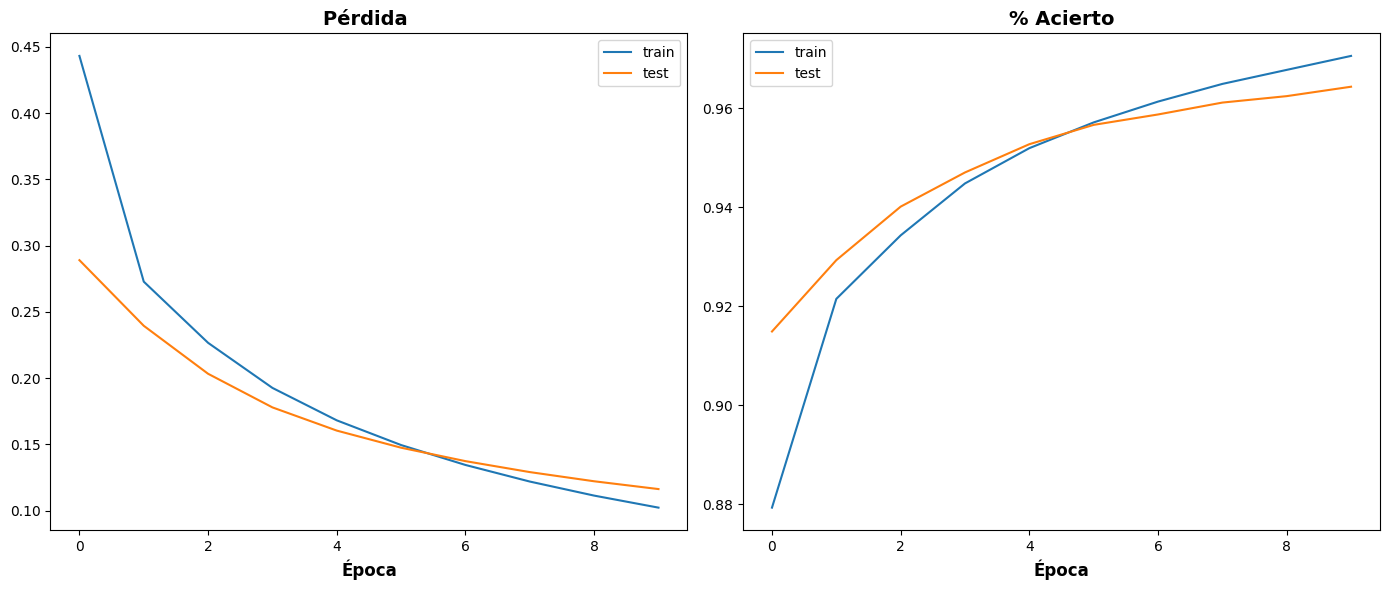

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_elu.history['loss'], label="train")
axs[0].plot(hist_elu.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_elu.history['accuracy'], label="train")
axs[1].plot(hist_elu.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()


#CONCLUSIONES RELU VS ELU

In [28]:
relu_vs_elu = {
    'M√©trica': list(hist_relu.history.keys()),
    'hist_relu': [hist_relu.history[k][-1] for k in hist_relu.history],
    'hist_elu': [hist_elu.history[k][-1] for k in hist_elu.history]
}

df = pd.DataFrame(relu_vs_elu)

display(df)

M√©trica  hist_relu  hist_elu
0      accuracy   0.998383  0.970517
1          loss   0.012298  0.102366
2  val_accuracy   0.976600  0.964300
3      val_loss   0.079707  0.116368

ReLU mostr√≥ una alta precisi√≥n en entrenamiento (0.9983) y una buena generalizaci√≥n en validaci√≥n (0.9766), con una r√°pida convergencia (loss bajo). Sin embargo, existe el riesgo de "neuronas muertas", lo que puede afectar el aprendizaje en redes m√°s profundas o con pesos mal inicializados.

ELU, en cambio, obtuvo resultados algo inferiores en ambas m√©tricas (accuracy de 0.9705 en entrenamiento y 0.9643 en validaci√≥n), con un mayor valor de p√©rdida, lo que indica una convergencia m√°s lenta o menos eficiente. No obstante, su capacidad de producir salidas negativas ayuda a evitar el problema de las neuronas muertas, lo cual puede ser beneficioso en ciertos contextos o arquitecturas.

En resumen, ReLU se comport√≥ mejor en este caso espec√≠fico, pero ELU podr√≠a ofrecer ventajas en modelos m√°s complejos o con problemas de desactivaci√≥n de neuronas.

Ya que nuestro set de dato es simple nos eligirimos la funcion ReLU como funcion activadora para los siguientes cambios.

## Cambio batch size

### Batch size de 64

In [29]:
red_batch64 = keras.Sequential(name="relu_bs_64")
red_batch64.add(keras.layers.Input(shape=(N,), name='entrada'))
red_batch64.add(keras.layers.Dense(h1, activation='relu'))
red_batch64.add(keras.layers.Dense(h2, activation='relu'))
red_batch64.add(keras.layers.Dense(h3, activation='relu'))
red_batch64.add(keras.layers.Dense(C, activation='softmax'))

red_batch64.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_batch64 = red_batch64.fit(X_train, y_train,
        epochs=10,
        batch_size=64,
        validation_data=(X_test,y_test)
       )
red_batch64.save("red_batch64.keras")

Epoch 1/10
938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 8ms/step - accuracy: 0.6576 - loss: 1.2946 - val_accuracy: 0.9019 - val_loss: 0.3499
Epoch 2/10
938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 9ms/step - accuracy: 0.9086 - loss: 0.3293 - val_accuracy: 0.9243 - val_loss: 0.2636
Epoch 3/10
938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 9ms/step - accuracy: 0.9250 - loss: 0.2596 - val_accuracy: 0.9337 - val_loss: 0.2239
Epoch 4/10
938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 8ms/step - accuracy: 0.9369 - loss: 0.2213 - val_accuracy: 0.9417 - val_loss: 0.1967
Epoch 5/10
938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 10ms/step - accuracy: 0.9454 - loss: 0.1933 - val_accuracy: 0.9488 - val_loss: 0.1760
Epoch 6/10
938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 9ms/step - accuracy: 0.9509 - loss: 0.1714 - val_accuracy: 0.9535 - val_lo

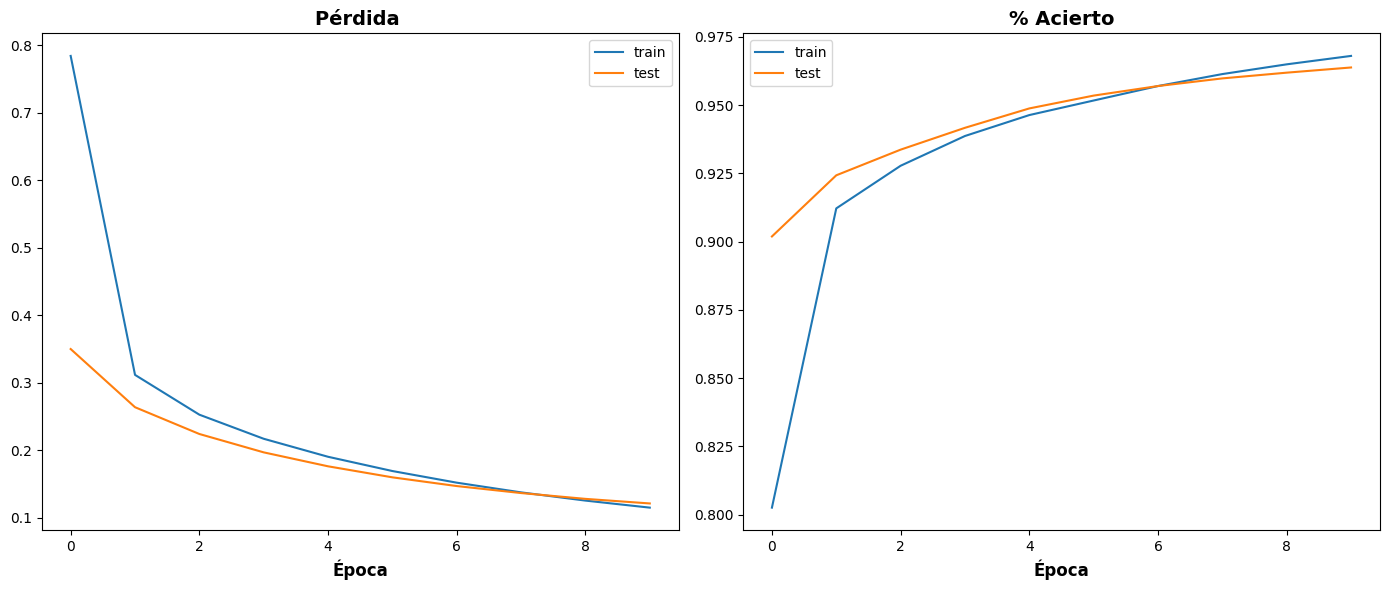

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_batch64.history['loss'], label="train")
axs[0].plot(hist_batch64.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_batch64.history['accuracy'], label="train")
axs[1].plot(hist_batch64.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()


### Batch size de 256

In [32]:
red_batch256 = keras.Sequential(name="batch256")
red_batch256.add(keras.layers.Input(shape=(N,), name='entrada'))
red_batch256.add(keras.layers.Dense(h1, activation='relu'))
red_batch256.add(keras.layers.Dense(h2, activation='relu'))
red_batch256.add(keras.layers.Dense(h3, activation='relu'))
red_batch256.add(keras.layers.Dense(C, activation='softmax'))

red_batch256.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_batch256 = red_batch256.fit(X_train, y_train,
        epochs=10,
        batch_size=256,
        validation_data=(X_test,y_test)
       )
red_batch256.save("red_batch256.keras")

Epoch 1/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 20ms/step - accuracy: 0.3781 - loss: 2.0048 - val_accuracy: 0.8183 - val_loss: 0.8969
Epoch 2/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 18ms/step - accuracy: 0.8321 - loss: 0.7583 - val_accuracy: 0.8772 - val_loss: 0.4894
Epoch 3/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 27ms/step - accuracy: 0.8794 - loss: 0.4701 - val_accuracy: 0.8938 - val_loss: 0.3867
Epoch 4/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 20ms/step - accuracy: 0.8957 - loss: 0.3840 - val_accuracy: 0.9067 - val_loss: 0.3395
Epoch 5/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 21ms/step - accuracy: 0.9049 - loss: 0.3408 - val_accuracy: 0.9129 - val_loss: 0.3107
Epoch 6/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 18ms/step - accuracy: 0.9107 - loss: 0.3129 - val_accuracy: 0.9181 - val

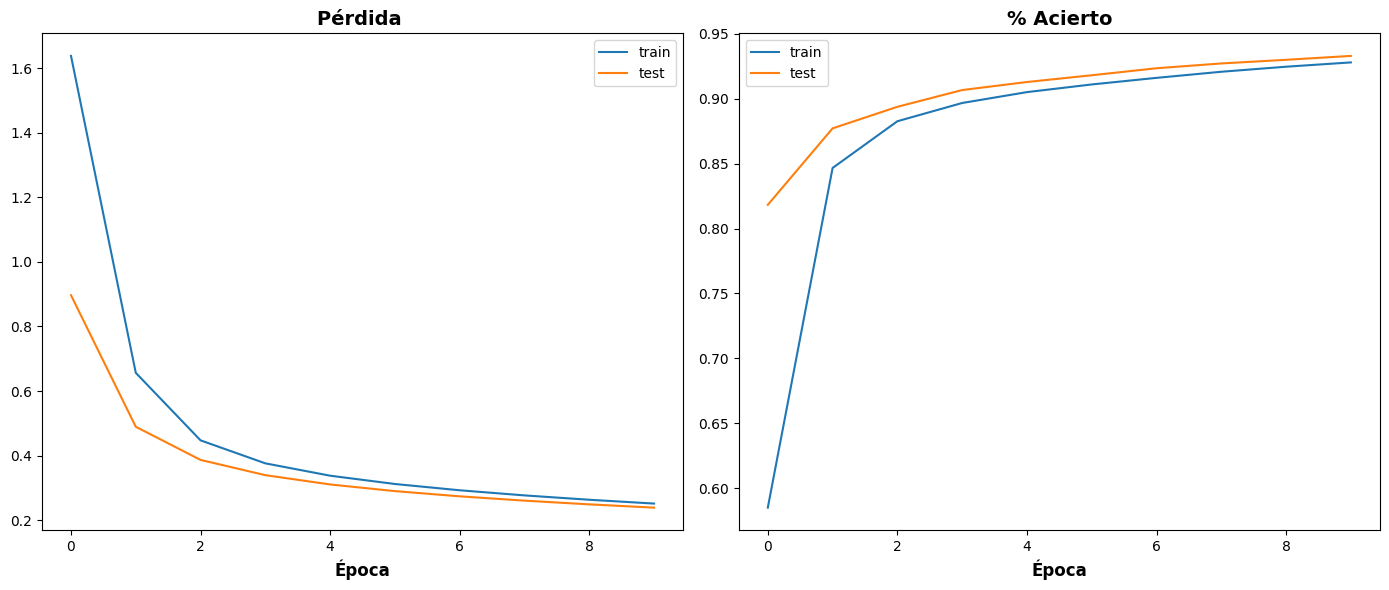

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_batch256.history['loss'], label="train")
axs[0].plot(hist_batch256.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_batch256.history['accuracy'], label="train")
axs[1].plot(hist_batch256.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()


In [33]:
Batch_size_vs = {
    'M√©trica': list(hist_relu.history.keys()),
    'batch size = 32': [hist_relu.history[k][-1] for k in hist_relu.history],
    'batch size = 64': [hist_batch64.history[k][-1] for k in hist_batch64.history],
    'batch size = 256': [hist_batch256.history[k][-1] for k in hist_batch256.history],
}

df_batch = pd.DataFrame(Batch_size_vs)

display(df_batch)

M√©trica  batch size = 32  batch size = 64  batch size = 256
0      accuracy         0.998383         0.968033          0.928000
1          loss         0.012298         0.114751          0.251487
2  val_accuracy         0.976600         0.963800          0.933000
3      val_loss         0.079707         0.120949          0.238870

El batch size m√°s peque√±o (32) produjo los mejores resultados tanto en entrenamiento como en validaci√≥n. Tiene la mayor accuracy y val_accuracy, y las menores loss y val_loss A medida que el batch size aumenta, el rendimiento empeora:

La precisi√≥n (accuracy y val_accuracy) disminuye.

La p√©rdida (loss y val_loss) aumenta notablemente.

Batch sizes peque√±os tienden a proporcionar un aprendizaje con mejores metricas (accuracy y perdida), ###al introducir m√°s ruido estoc√°stico que puede ayudar a salir de m√≠nimos locales.

En cambio, batch sizes grandes pueden hacer que el modelo converja m√°s r√°pido, pero a veces a soluciones menos √≥ptimas. Pero batch sizes grandes pueden reducir el sobreentrenamiento, y se ve reflejado en la diferencia de accuracy y su validacion Batch size 32	con una diferencia de 0.0218, batch size de 64 con un diferencia de 0.0042 y batch size de 256 con una diferencia de 0.0050.

En conclucion:

Batch size peque√±o (32): aprende muy bien, pero tambi√©n tiende a memorizar m√°s el entrenamiento con mayor riesgo de overfitting.

Batch size grande (256): aprende de forma m√°s "estable", menos overfitting, pero tambi√©n menor rendimiento o errores mas grandes

Ya que el sobre entrenmiento en nuestro caso no es tan grande nos quedaremos con un batch size de 32 ya que la perdida o el error es mucho mas bajo que los demas tama√±os.

## Cambio de epochs

In [34]:
red_epoca = keras.Sequential(name="Mi_Red")
red_epoca.add(keras.layers.Input(shape=(N,), name='entrada'))
red_epoca.add(keras.layers.Dense(h1, activation='relu'))
red_epoca.add(keras.layers.Dense(h2, activation='relu'))
red_epoca.add(keras.layers.Dense(h3, activation='relu'))
red_epoca.add(keras.layers.Dense(C, activation='softmax'))

red_epoca.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_epoca = red_epoca.fit(X_train, y_train,
        epochs=30,
        batch_size=32,
        validation_data=(X_test,y_test)
       )
red_epoca.save("red_epoca.keras")

Epoch 1/30
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 7ms/step - accuracy: 0.7360 - loss: 0.9832 - val_accuracy: 0.9221 - val_loss: 0.2656
Epoch 2/30
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 7ms/step - accuracy: 0.9258 - loss: 0.2552 - val_accuracy: 0.9404 - val_loss: 0.1999
Epoch 3/30
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16s 9ms/step - accuracy: 0.9429 - loss: 0.1940 - val_accuracy: 0.9514 - val_loss: 0.1655
Epoch 4/30
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16s 6ms/step - accuracy: 0.9549 - loss: 0.1565 - val_accuracy: 0.9565 - val_loss: 0.1432
Epoch 5/30
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14s 7ms/step - accuracy: 0.9627 - loss: 0.1301 - val_accuracy: 0.9616 - val_loss: 0.1278
Epoch 6/30
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15s 8ms/step - accuracy: 0.9686 - loss: 0.1104 - val_accuracy: 

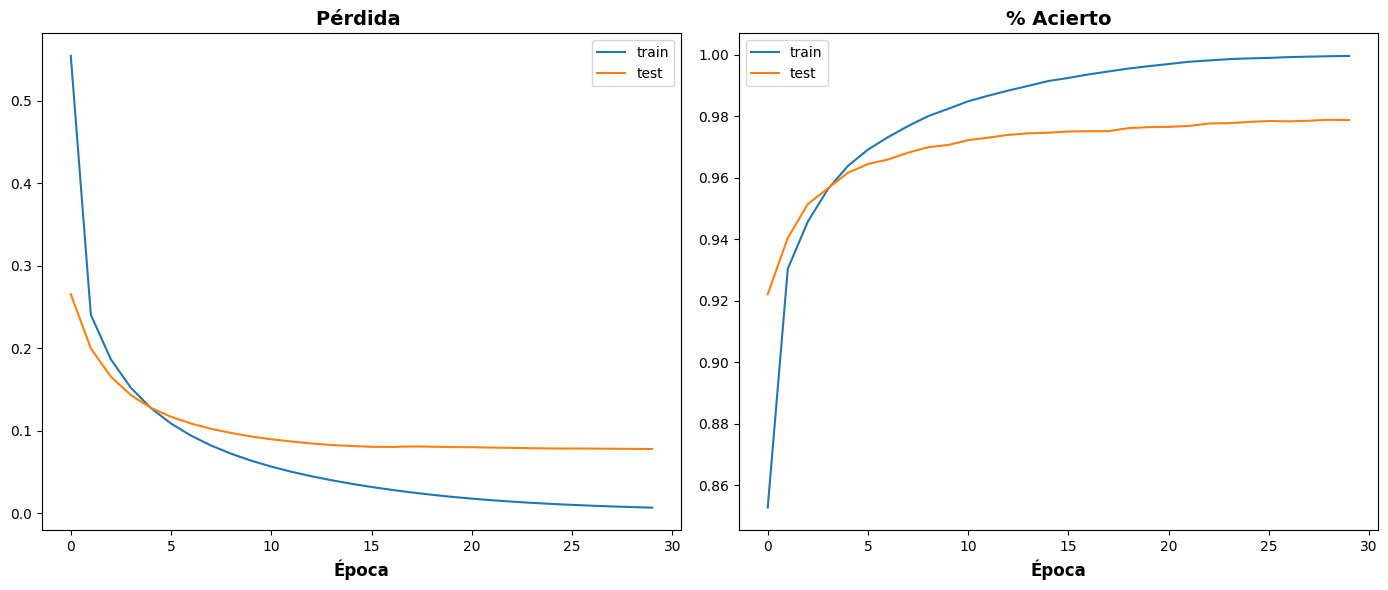

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_epoca.history['loss'], label="train")
axs[0].plot(hist_epoca.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_epoca.history['accuracy'], label="train")
axs[1].plot(hist_epoca.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()

In [37]:
Epoca_vs = {
    'M√©trica': list(hist_relu.history.keys()),
    'Epoca = 10': [hist_relu.history[k][-1] for k in hist_relu.history],
    'Epoca = 30': [hist_epoca.history[k][-1] for k in hist_epoca.history],
    #'Epoca = 50': [.history[k][-1] for k in .history],
}

df_epoca = pd.DataFrame(Epoca_vs)

display(df_epoca)

M√©trica  Epoca = 10  Epoca = 30
0      accuracy    0.998383    0.999567
1          loss    0.012298    0.006757
2  val_accuracy    0.976600    0.978700
3      val_loss    0.079707    0.077821

Al aumentar las √©pocas de entrenamiento de 10 a 30, se observa una mejora general en todas las m√©tricas.

El modelo logra una mayor precisi√≥n tanto en entrenamiento como en validaci√≥n:

accuracy: sube ligeramente de 0.9984 ‚Üí 0.9996

val_accuracy: tambi√©n mejora, aunque de forma m√°s modesta (0.9766 ‚Üí 0.9787)

La p√©rdida (loss) disminuye en ambos conjuntos:

loss: se reduce casi a la mitad (0.0123 ‚Üí 0.0068)

val_loss: tambi√©n mejora, aunque de manera leve (0.0797 ‚Üí 0.0778)

¬°Buena pregunta! Aumentar la cantidad de √©pocas puede mejorar el rendimiento, pero tambi√©n tiene costos y riesgos que vale la pena considerar. Te los explico:

‚öñÔ∏è Costos de usar m√°s √©pocas
1. üïí Mayor tiempo de entrenamiento
Cada √©poca significa pasar una vez por todo el conjunto de datos, as√≠ que m√°s √©pocas = m√°s tiempo.

Esto puede ser costoso si:

El dataset es grande

Est√°s probando muchas configuraciones

Usas hardware limitado

2. üß† Riesgo de sobreentrenamiento (overfitting)
A partir de cierto punto, el modelo memoriza el conjunto de entrenamiento en vez de aprender a generalizar.

Esto se nota cuando:

accuracy sigue subiendo

pero val_accuracy se estanca o baja

y val_loss comienza a subir

En tu tabla, no se ve sobreentrenamiento a√∫n, pero si entrenaras 100 √©pocas podr√≠as empezar a verlo.

3. üí∞ Mayor consumo de recursos
M√°s uso de GPU/CPU

M√°s energ√≠a (si entrenas en cloud, m√°s costos)

Mayor desgaste de hardware si haces muchos ciclos largos

##Cambio numero de capas

In [41]:
red_capa4 = keras.Sequential(name="Red_4capas")
red_capa4.add(keras.layers.Input(shape=(N,), name='entrada'))
red_capa4.add(keras.layers.Dense(h1, activation='relu'))
red_capa4.add(keras.layers.Dense(h1, activation='relu'))
red_capa4.add(keras.layers.Dense(h2, activation='relu'))
red_capa4.add(keras.layers.Dense(h3, activation='relu'))
red_capa4.add(keras.layers.Dense(C, activation='softmax'))

red_capa4.summary()

Model: "Mi_Red"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense_21 (Dense)                ‚îÇ (None, 512)            ‚îÇ       401,920 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_22 (Dense)                ‚îÇ (None, 512)            ‚îÇ       262,656 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_23 (Dense)                ‚îÇ (None, 256)            ‚îÇ       131,328 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_24 (Dense)                ‚îÇ (None, 128)            ‚îÇ        32,896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_25 (Dense)                ‚îÇ (None, 10)             ‚îÇ         1,290 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 830,090 (3.17 MB)

 Trainable params: 830,090 (3.17 MB)

 Non-trainable params: 0 (0.00 B)

####PREGUNTAR A LA PROFE SI O SI EL TAMA√ëO DE NEURONA IENE QUE BAJAR; YO RENIA ENTENDIDO QUE NO Y SI SE PUEDE REPERTIR VALOR

In [40]:
red_capa4.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_capa4 = red_capa4.fit(X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test,y_test)
       )
red_capa4.save("red_capa4.keras")

Epoch 1/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23s 12ms/step - accuracy: 0.9902 - loss: 0.0388 - val_accuracy: 0.9758 - val_loss: 0.0828
Epoch 2/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19s 10ms/step - accuracy: 0.9915 - loss: 0.0331 - val_accuracy: 0.9758 - val_loss: 0.0824
Epoch 3/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17s 9ms/step - accuracy: 0.9932 - loss: 0.0282 - val_accuracy: 0.9755 - val_loss: 0.0832
Epoch 4/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17s 9ms/step - accuracy: 0.9950 - loss: 0.0239 - val_accuracy: 0.9757 - val_loss: 0.0852
Epoch 5/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18s 10ms/step - accuracy: 0.9963 - loss: 0.0201 - val_accuracy: 0.9755 - val_loss: 0.0878
Epoch 6/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17s 9ms/step - accuracy: 0.9973 - loss: 0.0169 - val_accurac

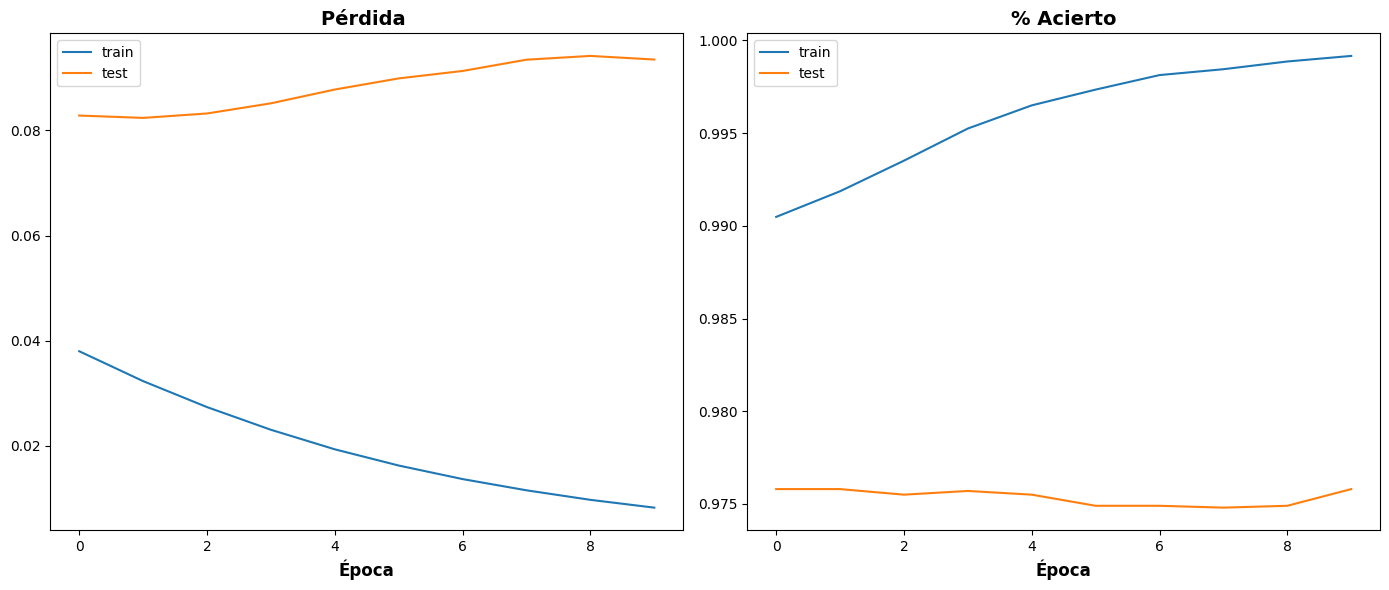

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_capa4.history['loss'], label="train")
axs[0].plot(hist_capa4.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_capa4.history['accuracy'], label="train")
axs[1].plot(hist_capa4.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()

In [44]:
Capas_vs = {
    'M√©trica': list(hist_relu.history.keys()),
    'Capas = 3': [hist_relu.history[k][-1] for k in hist_relu.history],
    'Capas = 4': [hist_capa4.history[k][-1] for k in hist_capa4.history]
}

df_capas = pd.DataFrame(Capas_vs)

display(df_capas)

M√©trica  Capas = 3  Capas = 4
0      accuracy   0.998383   0.999167
1          loss   0.012298   0.008260
2  val_accuracy   0.976600   0.975800
3      val_loss   0.079707   0.093497

## Agregaci√≥n de regulaci√≥n (drop-out)

In [50]:
red_dropout = keras.Sequential(name="red_dropout")
red_dropout.add(keras.layers.Input(shape=(N,), name='entrada'))
red_dropout.add(keras.layers.Dense(h1, activation='relu'))
#
red_dropout.add(keras.layers.Dense(30, activation='relu'))
red_dropout.add(keras.layers.Dropout(0.3))
red_dropout.add(keras.layers.Dense(20, activation='relu'))
#
red_dropout.add(keras.layers.Dense(h2, activation='relu'))
red_dropout.add(keras.layers.Dense(h3, activation='relu'))
red_dropout.add(keras.layers.Dense(C, activation='softmax'))

red_dropout.summary()

Model: "red_dropout"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense_54 (Dense)                ‚îÇ (None, 512)            ‚îÇ       401,920 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_55 (Dense)                ‚îÇ (None, 30)             ‚îÇ        15,390 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_6 (Dropout)             ‚îÇ (None, 30)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_56 (Dense)                ‚îÇ (None, 20)             ‚îÇ           620 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_57 (Dense)                ‚îÇ (None, 256)            ‚îÇ         5,376 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_58 (Dense)                ‚îÇ (None, 128)            ‚îÇ        32,896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_59 (Dense)                ‚îÇ (None, 10)             ‚îÇ         1,290 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 457,492 (1.75 MB)

 Trainable params: 457,492 (1.75 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
red_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_dropout = red_dropout.fit(X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test,y_test)
       )

Epoch 1/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 7ms/step - accuracy: 0.3167 - loss: 1.9391 - val_accuracy: 0.8871 - val_loss: 0.4044
Epoch 2/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 6ms/step - accuracy: 0.8435 - loss: 0.5104 - val_accuracy: 0.9259 - val_loss: 0.2503
Epoch 3/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 10ms/step - accuracy: 0.8952 - loss: 0.3453 - val_accuracy: 0.9441 - val_loss: 0.1930
Epoch 4/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15s 7ms/step - accuracy: 0.9192 - loss: 0.2668 - val_accuracy: 0.9558 - val_loss: 0.1519
Epoch 5/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 7ms/step - accuracy: 0.9361 - loss: 0.2159 - val_accuracy: 0.9600 - val_loss: 0.1328
Epoch 6/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17s 6ms/step - accuracy: 0.9450 - loss: 0.1818 - val_accuracy:

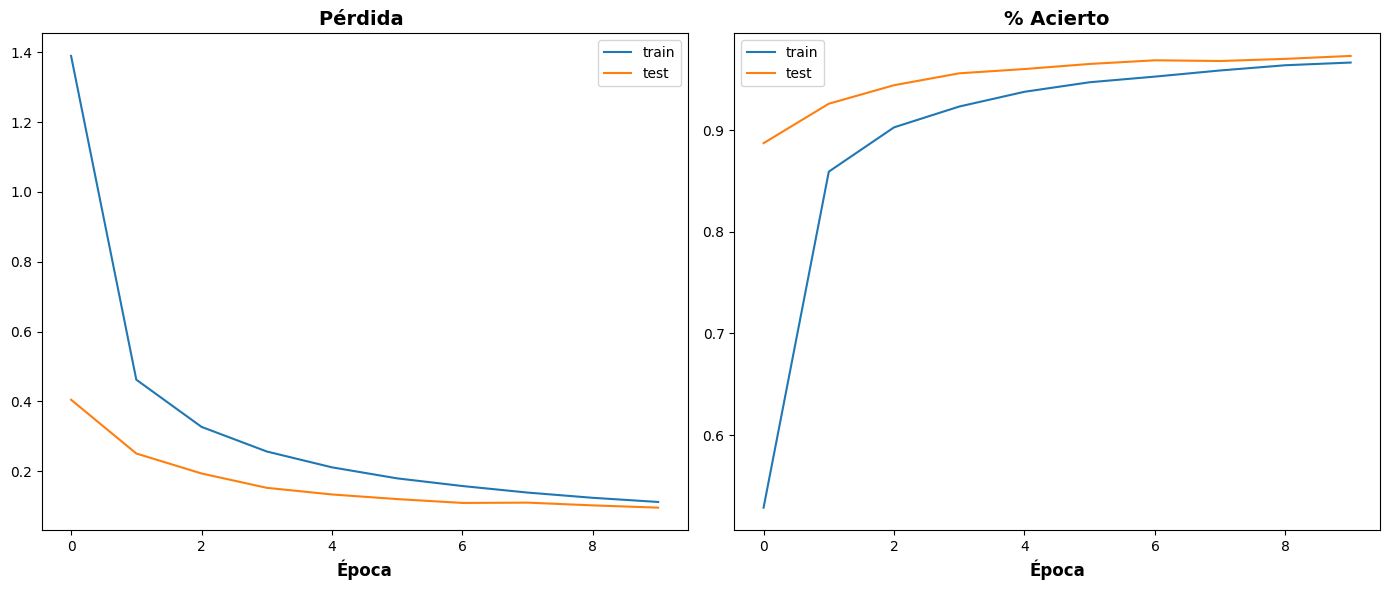

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_dropout.history['loss'], label="train")
axs[0].plot(hist_dropout.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_dropout.history['accuracy'], label="train")
axs[1].plot(hist_dropout.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()


In [53]:
Dropout_vs = {
    'M√©trica': list(hist_relu.history.keys()),
    'Sin DropOut': [hist_relu.history[k][-1] for k in hist_relu.history],
    'Con DropOut': [hist_dropout.history[k][-1] for k in hist_dropout.history]
}

df_dropout = pd.DataFrame(Dropout_vs)

display(df_dropout)

M√©trica  Sin DropOut  Con DropOut
0      accuracy     0.998383     0.966383
1          loss     0.012298     0.111348
2  val_accuracy     0.976600     0.972900
3      val_loss     0.079707     0.095088

# Experimento 2: Optimizador Adam

## Activadores (Relu y Elu)

### Relu

In [ ]:
red_relu_adam = keras.Sequential(name="Mi_Red")
red_relu_adam.add(keras.layers.Input(shape=(N,), name='entrada'))
red_relu_adam.add(keras.layers.Dense(h1, activation='relu'))
red_relu_adam.add(keras.layers.Dense(h2, activation='relu'))
red_relu_adam.add(keras.layers.Dense(h3, activation='relu'))
red_relu_adam.add(keras.layers.Dense(C, activation='softmax'))

red_relu_adam.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

hist_relu_adam = red_relu_adam.fit(X_train, y_train,
        epochs=10,
        batch_size=1,
        validation_data=(X_test,y_test)
       )

Epoch 1/10
60000/60000 [==============================] - 200s 3ms/step - loss: 0.2962 - accuracy: 0.9241 - val_loss: 0.2018 - val_accuracy: 0.9556
Epoch 2/10
60000/60000 [==============================] - 198s 3ms/step - loss: 0.2007 - accuracy: 0.9544 - val_loss: 0.2255 - val_accuracy: 0.9528
Epoch 3/10
60000/60000 [==============================] - 208s 3ms/step - loss: 0.1779 - accuracy: 0.9619 - val_loss: 0.1587 - val_accuracy: 0.9688
Epoch 4/10
60000/60000 [==============================] - 223s 4ms/step - loss: 0.1896 - accuracy: 0.9650 - val_loss: 0.3296 - val_accuracy: 0.9541
Epoch 5/10
60000/60000 [==============================] - 202s 3ms/step - loss: 0.1757 - accuracy: 0.9659 - val_loss: 0.1987 - val_accuracy: 0.9611
Epoch 6/10
60000/60000 [==============================] - 246s 4ms/step - loss: 0.1887 - accuracy: 0.9666 - val_loss: 0.3332 - val_accuracy: 0.9581
Epoch 7/10
60000/60000 [==============================] - 222s 4ms/step - loss: 0.1956 - accuracy: 0.9664 - val_

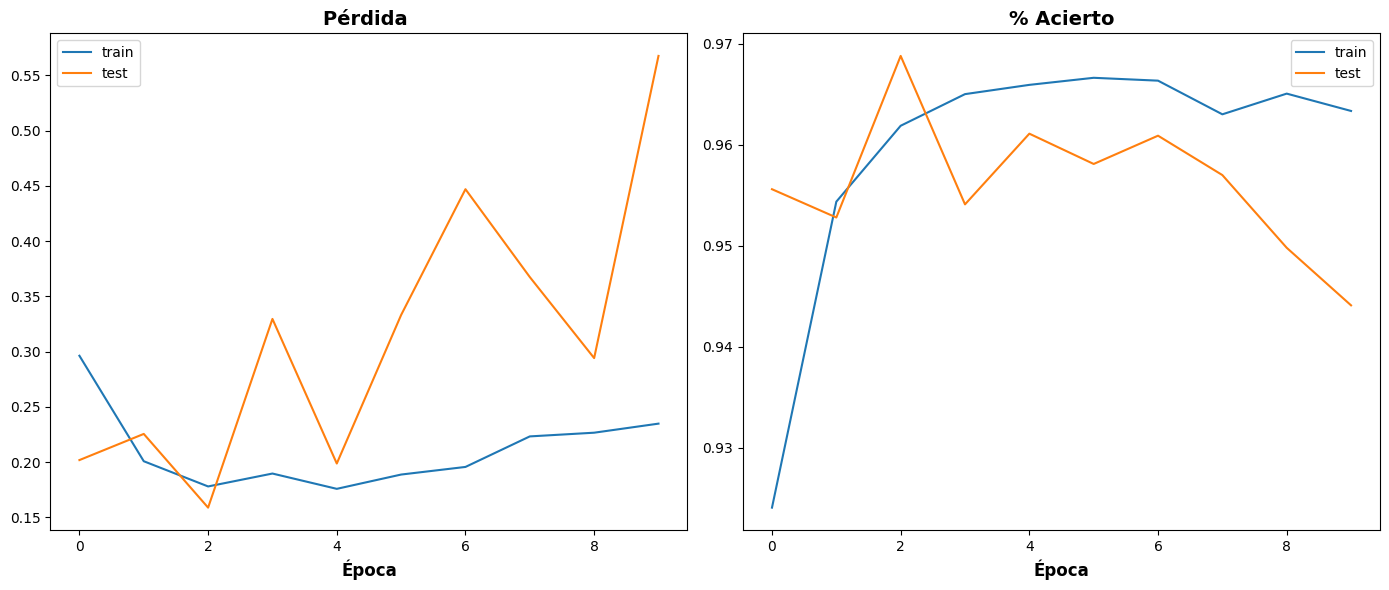

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

#axs.set_title('Activadores (Relu y Elu)', fontsize=14, fontweight="bold")

axs[0].plot(hist_relu_adam.history['loss'], label="train")
axs[0].plot(hist_relu_adam.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_relu_adam.history['accuracy'], label="train")
axs[1].plot(hist_relu_adam.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()


# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()


### ELU

In [ ]:
red_elu_adam = keras.Sequential(name="Mi_Red")
red_elu_adam.add(keras.layers.Input(shape=(N,), name='entrada'))
red_elu_adam.add(keras.layers.Dense(h1, activation='elu'))
red_elu_adam.add(keras.layers.Dense(h2, activation='elu'))
red_elu_adam.add(keras.layers.Dense(h3, activation='elu'))
red_elu_adam.add(keras.layers.Dense(C, activation='softmax'))

red_elu_adam.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Increased batch size to speed up training and avoid keyboard interrupt
hist_elu_adam = red_elu_adam.fit(X_train, y_train,
        epochs=10,
        batch_size=64,  # Changed from 1 to 64 to speed up training
        validation_data=(X_test,y_test)
       )

Epoch 1/10
938/938 [==============================] - 10s 10ms/step - loss: 0.2319 - accuracy: 0.9302 - val_loss: 0.1452 - val_accuracy: 0.9571
Epoch 2/10
938/938 [==============================] - 8s 9ms/step - loss: 0.1113 - accuracy: 0.9652 - val_loss: 0.1063 - val_accuracy: 0.9657
Epoch 3/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0799 - accuracy: 0.9747 - val_loss: 0.0830 - val_accuracy: 0.9749
Epoch 4/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0628 - accuracy: 0.9802 - val_loss: 0.1134 - val_accuracy: 0.9668
Epoch 5/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0527 - accuracy: 0.9830 - val_loss: 0.0725 - val_accuracy: 0.9791
Epoch 6/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0458 - accuracy: 0.9853 - val_loss: 0.0922 - val_accuracy: 0.9768
Epoch 7/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0390 - accuracy: 0.9870 - val_loss: 0.1008 - val_accuracy: 0.9745
Epoc

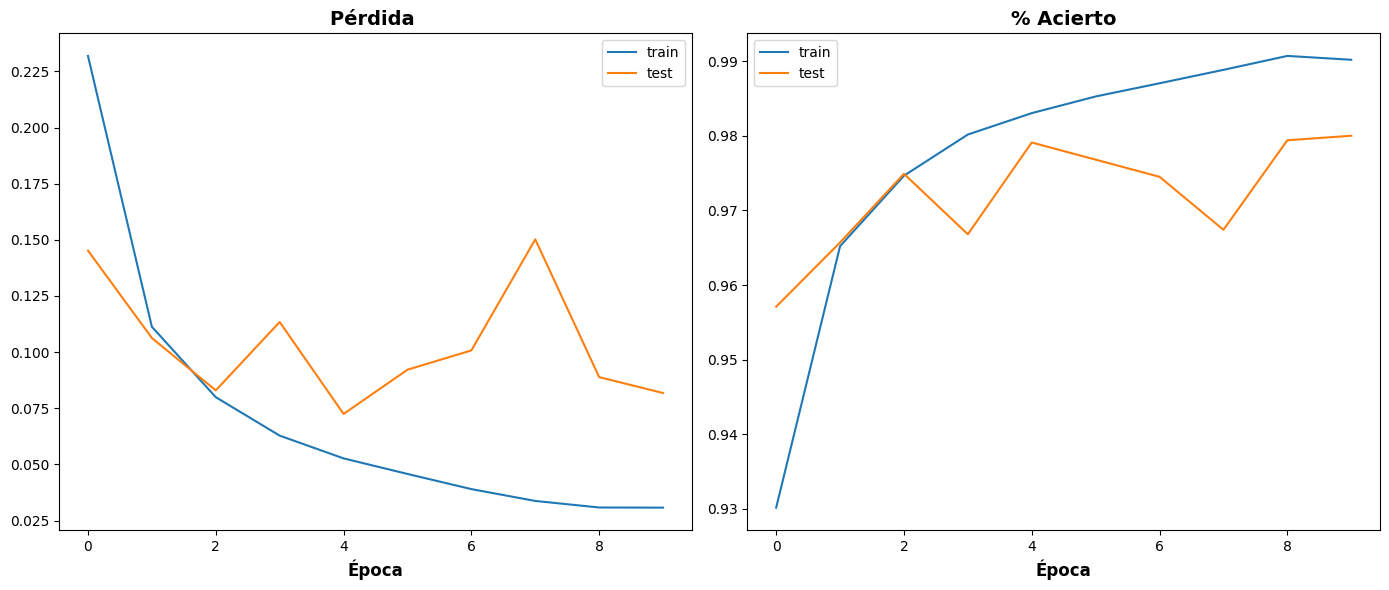

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_elu_adam.history['loss'], label="train")
axs[0].plot(hist_elu_adam.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_elu_adam.history['accuracy'], label="train")
axs[1].plot(hist_elu_adam.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()


# #

# Cambio Batch Size

# Cambio Batch Size de 32


In [ ]:
red_adam_batch32 = keras.Sequential(name="Mi_Red")
red_adam_batch32.add(keras.layers.Input(shape=(N,), name='entrada'))
red_adam_batch32.add(keras.layers.Dense(h1, activation='relu'))
red_adam_batch32.add(keras.layers.Dense(h2, activation='relu'))
red_adam_batch32.add(keras.layers.Dense(h3, activation='relu'))
red_adam_batch32.add(keras.layers.Dense(C, activation='softmax'))

red_adam_batch32.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

hist_adam_batch32 = red_adam_batch32.fit(X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test,y_test)
       )

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1942 - accuracy: 0.9415 - val_loss: 0.1263 - val_accuracy: 0.9611
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0881 - accuracy: 0.9736 - val_loss: 0.0897 - val_accuracy: 0.9719
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0616 - accuracy: 0.9805 - val_loss: 0.0763 - val_accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0460 - accuracy: 0.9860 - val_loss: 0.0794 - val_accuracy: 0.9762
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0379 - accuracy: 0.9879 - val_loss: 0.0743 - val_accuracy: 0.9807
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.0714 - val_accuracy: 0.9807
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0286 - accuracy: 0.9909 - val_loss: 0.0837 - val_acc

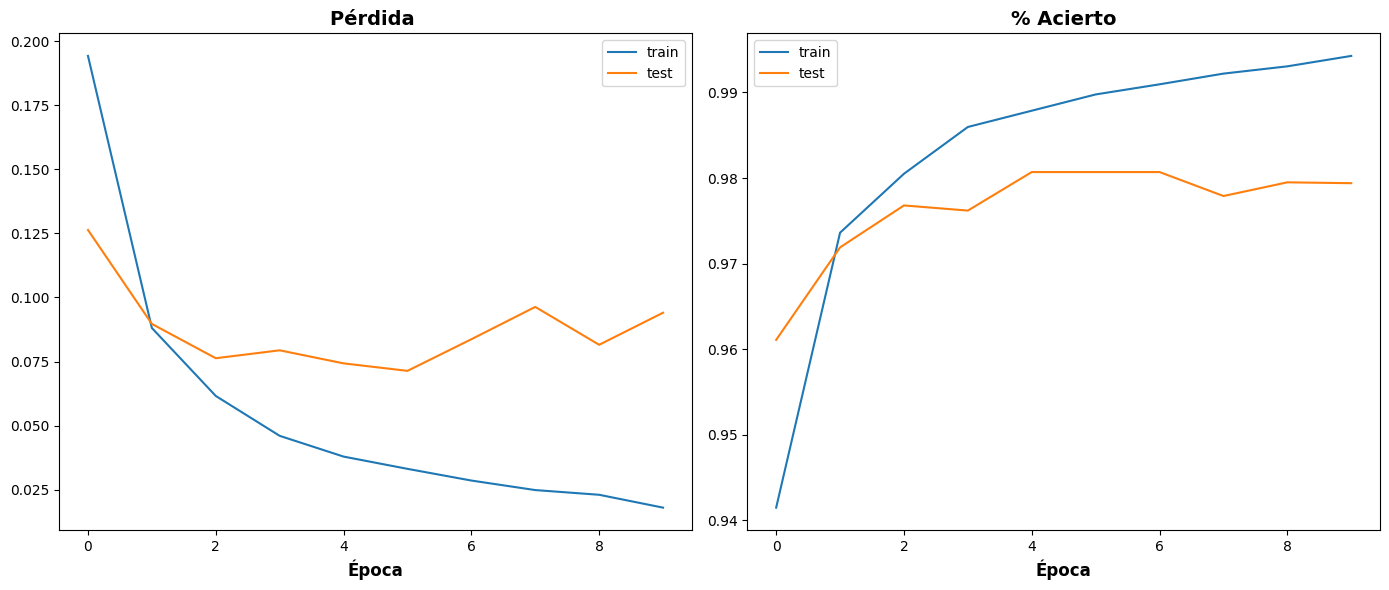

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_adam_batch32.history['loss'], label="train")
axs[0].plot(hist_adam_batch32.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_adam_batch32.history['accuracy'], label="train")
axs[1].plot(hist_adam_batch32.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()



## Cambio Batch Size de 64

In [ ]:
red_adam_batch64 = keras.Sequential(name="Mi_Red")
red_adam_batch64.add(keras.layers.Input(shape=(N,), name='entrada'))
red_adam_batch64.add(keras.layers.Dense(h1, activation='relu'))
red_adam_batch64.add(keras.layers.Dense(h2, activation='relu'))
red_adam_batch64.add(keras.layers.Dense(h3, activation='relu'))
red_adam_batch64.add(keras.layers.Dense(C, activation='softmax'))

red_adam_batch64.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

hist_adam_batch64 = red_adam_batch64.fit(X_train, y_train,
        epochs=10,
        batch_size=64,
        validation_data=(X_test,y_test)
       )

Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2062 - accuracy: 0.9386 - val_loss: 0.1402 - val_accuracy: 0.9518
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0832 - accuracy: 0.9740 - val_loss: 0.0943 - val_accuracy: 0.9698
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0576 - accuracy: 0.9816 - val_loss: 0.0792 - val_accuracy: 0.9761
Epoch 4/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0438 - accuracy: 0.9864 - val_loss: 0.0830 - val_accuracy: 0.9753
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0358 - accuracy: 0.9884 - val_loss: 0.0858 - val_accuracy: 0.9750
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0284 - accuracy: 0.9908 - val_loss: 0.0939 - val_accuracy: 0.9760
Epoch 7/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0268 - accuracy: 0.9913 - val_loss: 0.0779 - val_accuracy: 0.9797
Epoch 

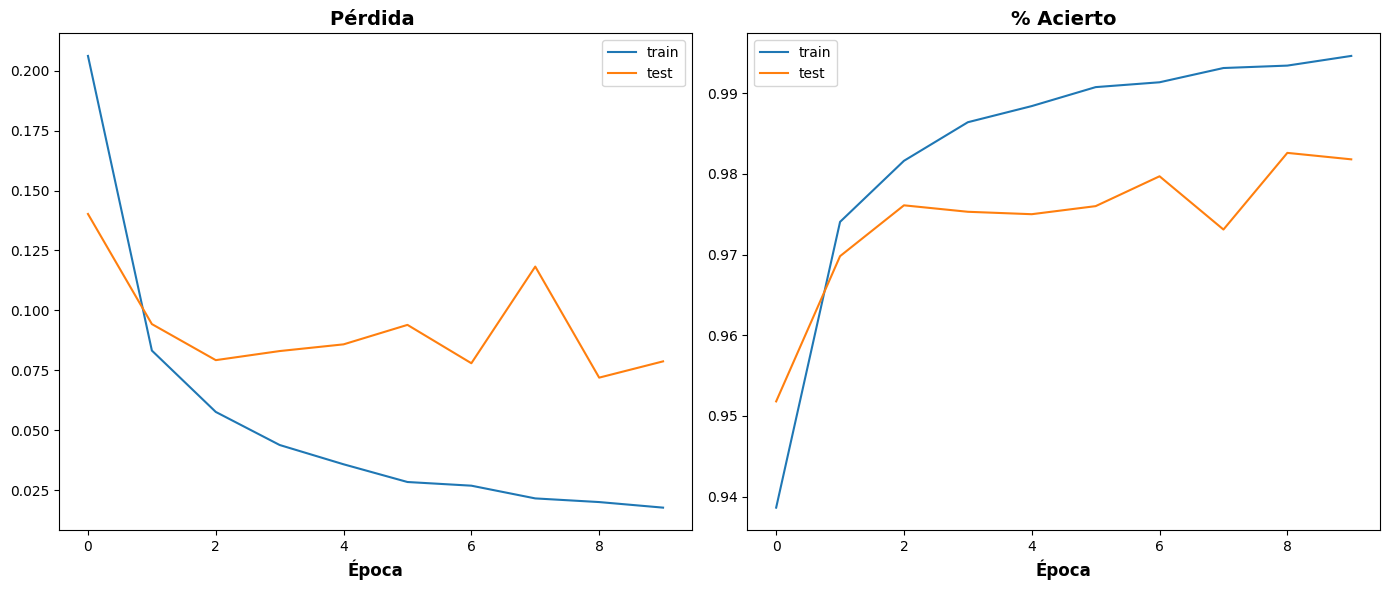

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_adam_batch64.history['loss'], label="train")
axs[0].plot(hist_adam_batch64.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_adam_batch64.history['accuracy'], label="train")
axs[1].plot(hist_adam_batch64.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()

## Cambio de epocas

In [ ]:
red_adam_epoca = keras.Sequential(name="Mi_Red")
red_adam_epoca.add(keras.layers.Input(shape=(N,), name='entrada'))
red_adam_epoca.add(keras.layers.Dense(h1, activation='relu'))
red_adam_epoca.add(keras.layers.Dense(h2, activation='relu'))
red_adam_epoca.add(keras.layers.Dense(h3, activation='relu'))
red_adam_epoca.add(keras.layers.Dense(C, activation='softmax'))

red_adam_epoca.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

hist_adam_epoca = red_adam_epoca.fit(X_train, y_train,
        epochs=30,
        batch_size=64,
        validation_data=(X_test,y_test)
       )

Epoch 1/30
938/938 [==============================] - 7s 6ms/step - loss: 0.2075 - accuracy: 0.9380 - val_loss: 0.1532 - val_accuracy: 0.9523
Epoch 2/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0849 - accuracy: 0.9735 - val_loss: 0.0916 - val_accuracy: 0.9705
Epoch 3/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0575 - accuracy: 0.9820 - val_loss: 0.0689 - val_accuracy: 0.9782
Epoch 4/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0429 - accuracy: 0.9863 - val_loss: 0.0902 - val_accuracy: 0.9726
Epoch 5/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0348 - accuracy: 0.9887 - val_loss: 0.0948 - val_accuracy: 0.9745
Epoch 6/30
938/938 [==============================] - 6s 6ms/step - loss: 0.0303 - accuracy: 0.9901 - val_loss: 0.0796 - val_accuracy: 0.9798
Epoch 7/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0228 - accuracy: 0.9927 - val_loss: 0.0770 - val_accuracy: 0.9795
Epoch 

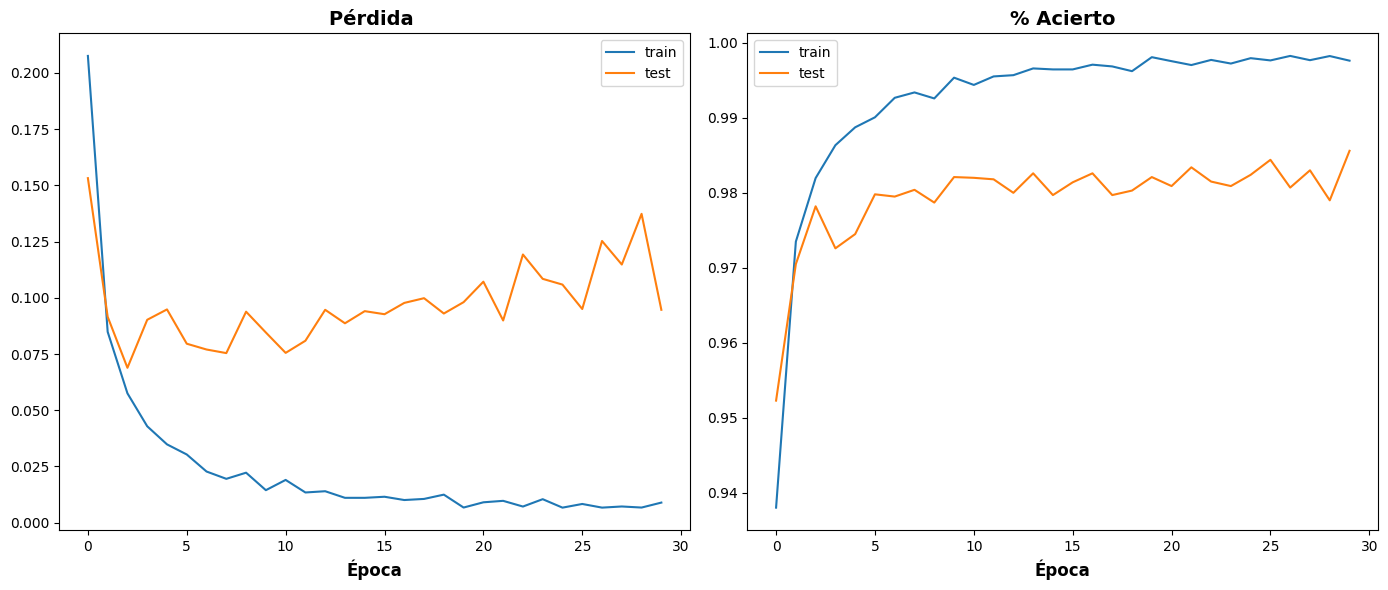

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_adam_epoca.history['loss'], label="train")
axs[0].plot(hist_adam_epoca.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_adam_epoca.history['accuracy'], label="train")
axs[1].plot(hist_adam_epoca.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()

## Agregaci√≥n de regulaci√≥n (drop-out)

In [ ]:
red_adam_dropout= keras.Sequential(name="Mi_Red")
red_adam_dropout.add(keras.layers.Input(shape=(N,), name='entrada'))
#
red_adam_dropout.add(keras.layers.Dense(30, activation='relu'))
red_adam_dropout.add(keras.layers.Dropout(0.3))
red_adam_dropout.add(keras.layers.Dense(20, activation='relu'))
#
red_adam_dropout.add(keras.layers.Dense(h1, activation='relu'))
red_adam_dropout.add(keras.layers.Dense(h2, activation='relu'))
red_adam_dropout.add(keras.layers.Dense(h3, activation='relu'))
red_adam_dropout.add(keras.layers.Dense(C, activation='softmax'))

red_adam_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_adam_dropout = red_adam_dropout.fit(X_train, y_train,
        epochs=30,
        batch_size=128,
        validation_data=(X_test,y_test)
       )

Epoch 1/30
469/469 [==============================] - 5s 9ms/step - loss: 2.1976 - accuracy: 0.2510 - val_loss: 1.8218 - val_accuracy: 0.5131
Epoch 2/30
469/469 [==============================] - 4s 9ms/step - loss: 1.3008 - accuracy: 0.5692 - val_loss: 0.7278 - val_accuracy: 0.7847
Epoch 3/30
469/469 [==============================] - 4s 9ms/step - loss: 0.8190 - accuracy: 0.7292 - val_loss: 0.5171 - val_accuracy: 0.8521
Epoch 4/30
469/469 [==============================] - 4s 9ms/step - loss: 0.6688 - accuracy: 0.7879 - val_loss: 0.4222 - val_accuracy: 0.8808
Epoch 5/30
469/469 [==============================] - 4s 9ms/step - loss: 0.5871 - accuracy: 0.8173 - val_loss: 0.3778 - val_accuracy: 0.8913
Epoch 6/30
469/469 [==============================] - 4s 9ms/step - loss: 0.5294 - accuracy: 0.8370 - val_loss: 0.3365 - val_accuracy: 0.9023
Epoch 7/30
469/469 [==============================] - 4s 8ms/step - loss: 0.4876 - accuracy: 0.8501 - val_loss: 0.3223 - val_accuracy: 0.9049
Epoch 

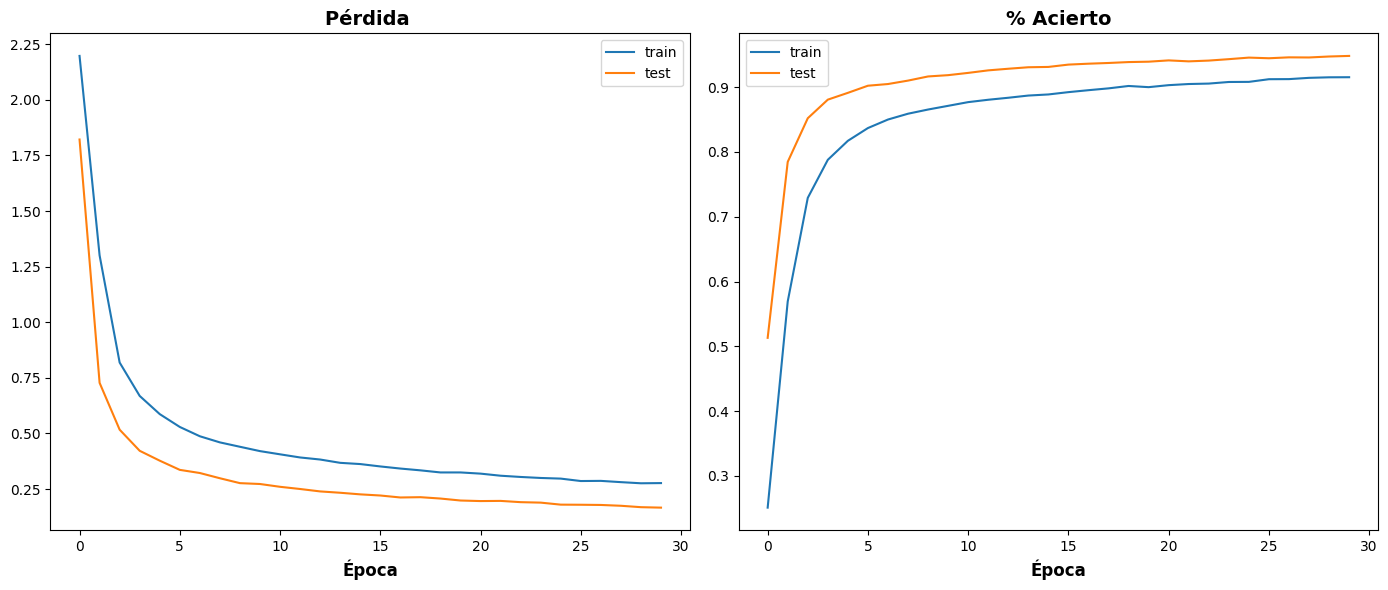

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_adam_dropout.history['loss'], label="train")
axs[0].plot(hist_adam_dropout.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_adam_dropout.history['accuracy'], label="train")
axs[1].plot(hist_adam_dropout.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()